<a href="https://colab.research.google.com/github/rewpak/AI-works/blob/main/Gen_Algorithms_8_Queens_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3. Genetic Algorithms
# Task 3.2 The 8-Queens Problem
## Problem Descriptions
The challenge in the 8-queens problem is to position eight queens on an 8x8 chessboard in such a way that none of them can attack each other. This means making sure no two queens share the same row, column, or diagonal.

Firstly we need to determine the encoding scheme, evaluation of fitness, and the genetic operators:

1. Encoding scheme: (y0, y1, …, y7) where the numbers are a permutation of 0-7. Each y-value, from y0 to y7, is a number from 0 to 7, indicating the row where a queen is placed in the corresponding column.

2. Fitness Function: Evaluates solutions in the 8-queens problem by counting how many queens are attacking each other. A higher count indicates a poorer solution. An optimal solution has a count of 0, indicating no queens are attacking each other.

3. Genetic operators:
    * Selection: picks potential solutions based on how well they're doing. Prefers solutions with fewer queen conflicts for reproduction.
    * Crossover: choose a crossover point randomly, the sub-strings before this point are copied from one parent, and the remaining part is filled in following the order in the second parent.
    * Mutation: Introduces small random changes to an individual's genetic material.
## Implementation and Results

In [ ]:
!pip install deap
import random
import numpy as np
from deap import algorithms, base, creator, tools


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.9 MB/s eta 0:00:00


In [ ]:
NB_QUEENS = 12

def evalNQueens(individual):

    # create 2 list for the falling diagonal (fd) and the raising diagonal (rd)
    fd = np.zeros(2*NB_QUEENS-1)
    rd = np.zeros(2*NB_QUEENS-1)

    # count the number of queens placed on diagonals fd/rd
    for i in range(NB_QUEENS):
      fd[i+individual[i]] += 1
      rd[NB_QUEENS-1-i+individual[i]] += 1

    # sum the number of queens if more than 1 queen on a diagonal
    return np.sum(fd[fd>1]) + np.sum(rd[rd>1]),


In [ ]:
# enforce only 1 queen per column by using a list of NB_QUEENS
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

# enforce only 1 queen per row by using permutation
toolbox = base.Toolbox()
toolbox.register("permutation", random.sample, range(NB_QUEENS), NB_QUEENS)

# register all elements of the GA
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.permutation)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evalNQueens)
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=2.0/NB_QUEENS)
toolbox.register("select", tools.selTournament, tournsize=3)

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [ ]:
# run the GA to get the result
random.seed(64)
pop = toolbox.population(n=300)
algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=50, verbose=False)
best = tools.selBest(pop, 1)[0]
print("Best: %s. Fitness value: %s" %(best, best.fitness.values[0]))

Best: [4, 7, 9, 6, 2, 0, 11, 8, 10, 1, 3, 5]. Fitness value: 0.0


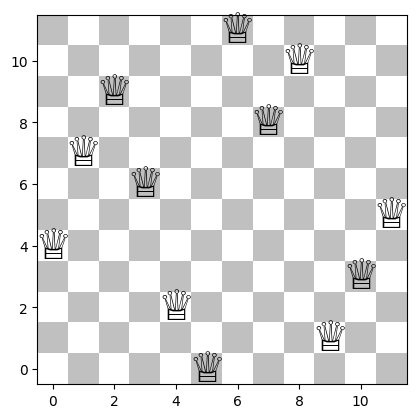

In [ ]:
# display the result
import matplotlib.pyplot as plt

chessboard = np.ones((NB_QUEENS, NB_QUEENS))
chessboard[1::2,0::2] = 0.75
chessboard[0::2,1::2] = 0.75
plt.imshow(chessboard, cmap='gray', origin='lower', vmin=0, vmax=1)
for x in range(NB_QUEENS):
    plt.text(x, best[x], '♕', fontsize=30, ha='center', va='center')

## Discussions

In this task, the Genetic Algorithm successfully solved the 8-Queens problem, finding the best arrangement as [5, 3, 1, 7, 4, 6, 0, 2] with a fitness value of 0.0. The fitness value of 0.0 indicates that all the rules were followed, showcasing the algorithm's effectiveness in dealing with the challenges of the 8-Queens problem.

the Genetic Algorithm also succeeded with 12 queens. It found the best arrangement as [4, 7, 9, 6, 2, 0, 11, 8, 10, 1, 3, 5] with a fitness value of 0.0. This means it solved the 12-Queens problem perfectly, showcasing the algorithm's effectiveness in tackling such challenges.